In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

import csv
reader = csv.reader(open("a1.csv"))
reader1 = csv.reader(open("a2.csv"))
f = open("output.csv", "w")
writer = csv.writer(f)

count=0
for row in reader:
    writer.writerow(row)
for row in reader1:
    if count!=0:
        writer.writerow(row)
    count += 1
f.close()

df = pd.read_csv('output.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,NaN,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21612.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370859,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930080,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f375cc090b8>,
      dtype=object)

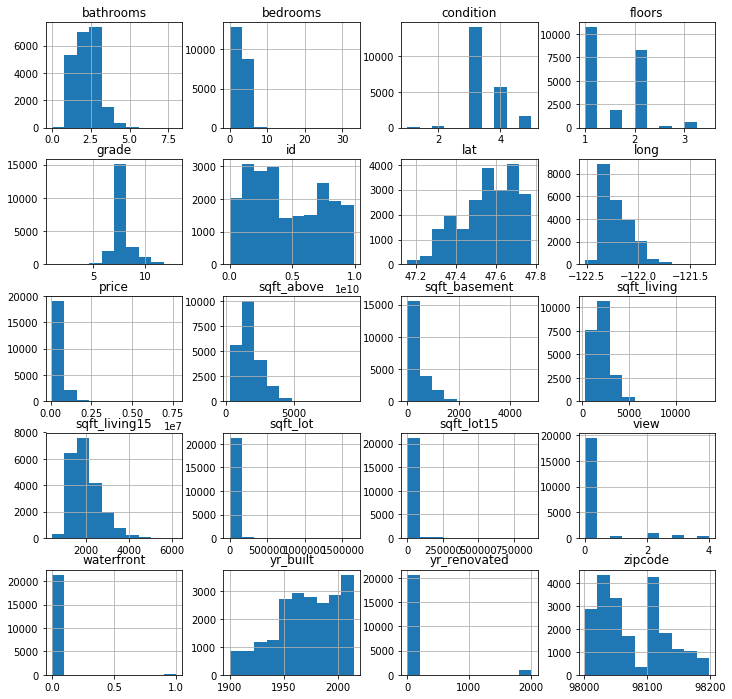

In [4]:
pd.DataFrame.hist(df,figsize=(12,12))

In [5]:
df['new_date'] = df['date'].astype(str).str[0:6]
df['new_date'] = pd.to_numeric(df.new_date)
df['new_date'] = pd.Categorical(df.new_date)
df=df.drop(['date'], axis=1)



In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21612.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370859,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930080,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370859,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930058,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df['grade'].value_counts()



7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

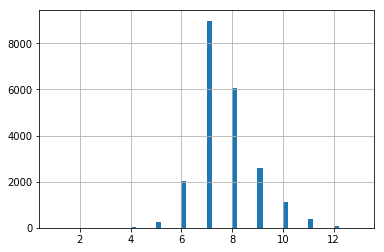

In [10]:
df['grade'].hist(bins=60)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
new_date         21613 non-null category
dtypes: category(1), float64(6), int64(14)
memory usage: 3.3 MB


In [12]:
df['waterfront'] = df.zipcode.astype('bool')
df['grade'] = df.zipcode.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null bool
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
new_date         21613 non-null category
dtypes: bool(1), category(2), float64(6), int64(12)
memory usage: 3.0 MB


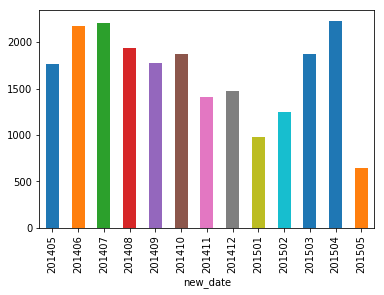

In [13]:
#df['new_date'].value_counts().plot(kind='bar')
df.groupby('new_date').size().plot(kind='bar')

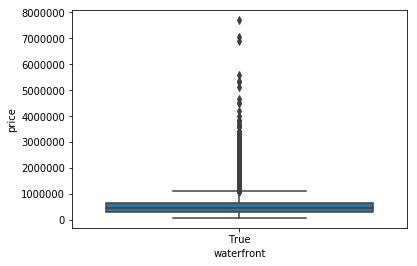

In [14]:
sns.boxplot(x="waterfront", y="price", data=df)


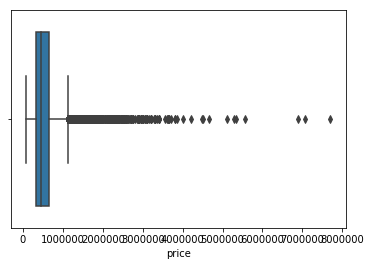

In [15]:
sns.boxplot("price", data=df)


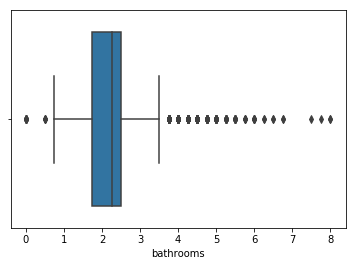

In [16]:
sns.boxplot("bathrooms", data=df)

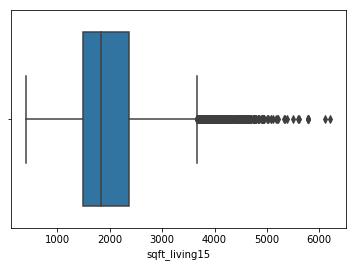

In [17]:
sns.boxplot("sqft_living15", data=df)

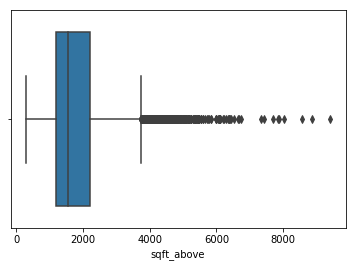

In [18]:
sns.boxplot("sqft_above", data=df)

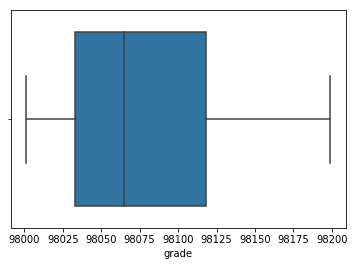

In [19]:
sns.boxplot("grade", data=df)

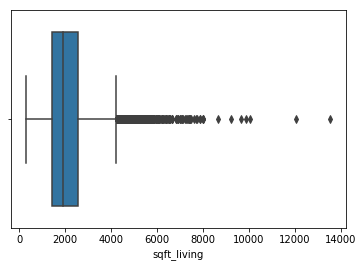

In [20]:
sns.boxplot("sqft_living", data=df)

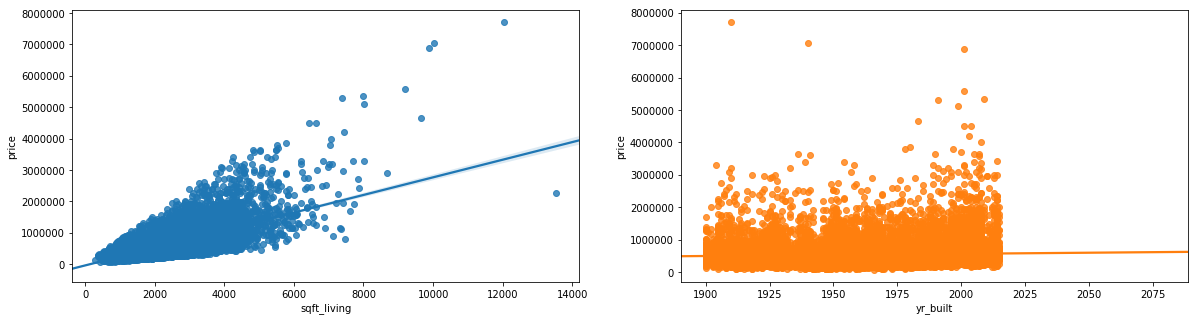

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.regplot(x="sqft_living", y="price", data=df,ax=ax1)
sns.regplot(x="yr_built", y="price", data=df,ax=ax2)

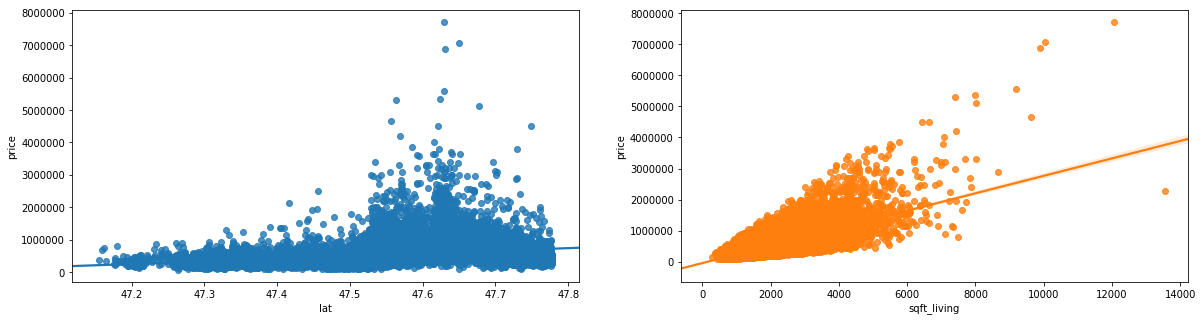

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.regplot(x="lat", y="price", data=df,ax=ax1)
sns.regplot(x="sqft_living", y="price", data=df,ax=ax2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null bool
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
new_date         21613 non-null category
dtypes: bool(1), category(2), float64(6), int64(12)
memory usage: 3.0 MB


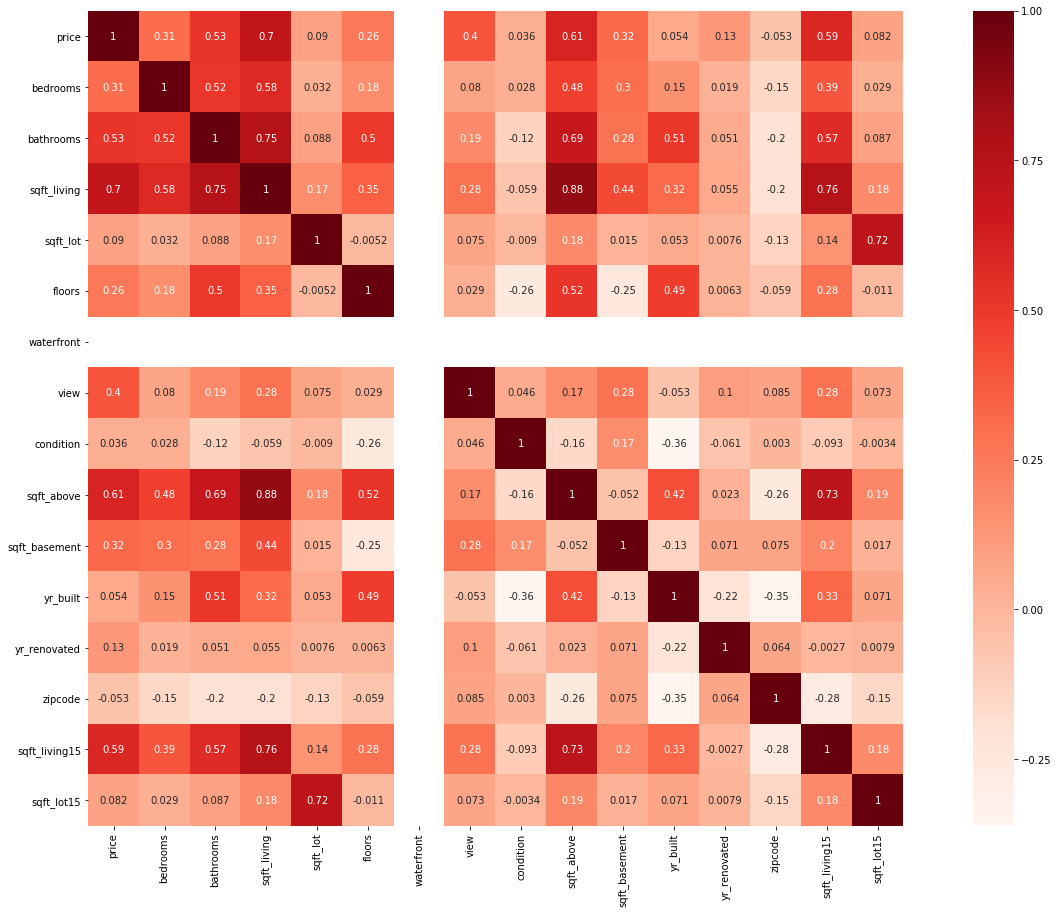

In [24]:
import matplotlib.cm as cm
corrmat = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","sqft_living15","sqft_lot15","new_date"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True,cmap=plt.cm.Reds)

In [25]:
abs(df.corr()['price']).sort_values()

id               0.016797
long             0.021571
condition        0.036392
zipcode          0.053168
yr_built         0.053982
sqft_lot15       0.082456
sqft_lot         0.089655
yr_renovated     0.126442
floors           0.256786
lat              0.306919
bedrooms         0.308324
sqft_basement    0.323837
view             0.397346
bathrooms        0.525134
sqft_living15    0.585374
sqft_above       0.605566
sqft_living      0.702044
price            1.000000
waterfront            NaN
Name: price, dtype: float64

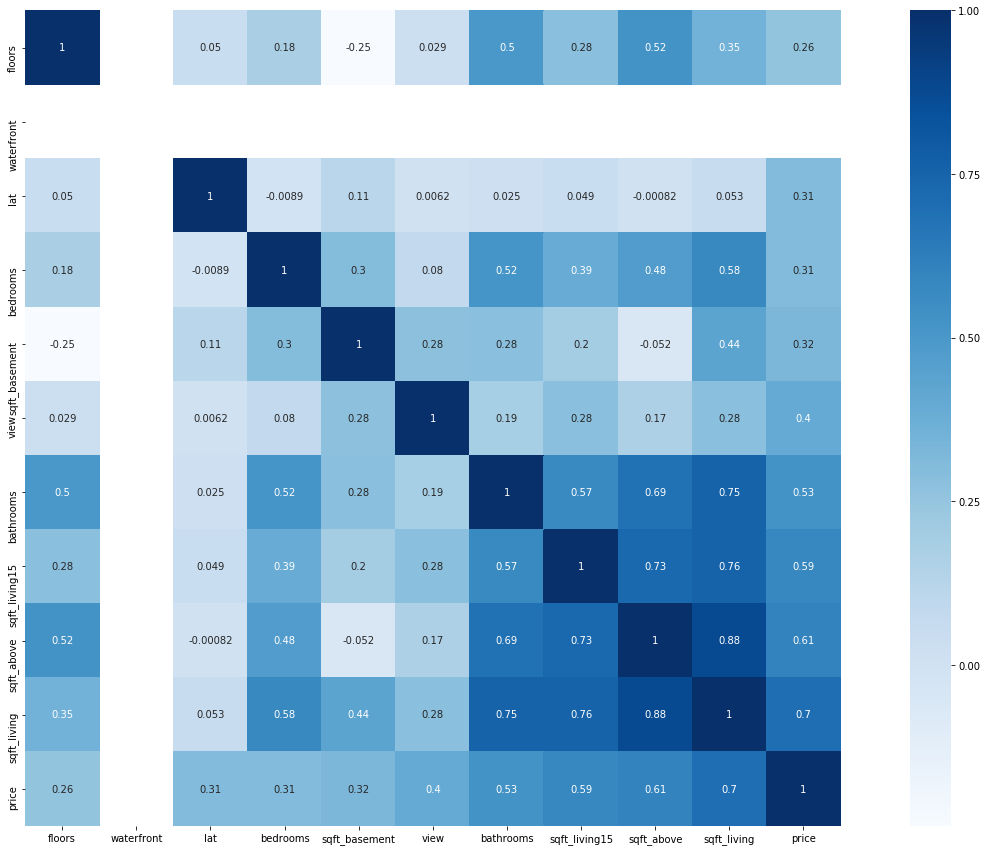

In [26]:
corrmat2 = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living", "price"]].corr()
df2 = df.loc[:, ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living", "price"]]
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat2,square=True,annot=True, cmap=plt.cm.Blues)

In [27]:
abs(df2.corr()['price']).sort_values()

floors           0.256786
lat              0.306919
bedrooms         0.308324
sqft_basement    0.323837
view             0.397346
bathrooms        0.525134
sqft_living15    0.585374
sqft_above       0.605566
sqft_living      0.702044
price            1.000000
waterfront            NaN
Name: price, dtype: float64

In [28]:
#df['year'] = df['new_date'].astype(str).str[0:4]
#df['date'].apply(lambda x: int(x[:4]))
df['new_sqft_living'] = np.where(df['new_date'].astype(str).str[0:4]=='2014', df['sqft_living'], df['sqft_living15'])
print(df['new_sqft_living'])

0        1180
1        2570
2        2720
3        1960
4        1800
5        5420
6        1715
7        1650
8        1780
9        2390
10       2210
11       1160
12       1430
13       1370
14       1360
15       2140
16       1890
17       1600
18       1200
19       1280
20       1620
21       3050
22       2270
23       1070
24       2450
25       1710
26       2450
27       1400
28       1520
29       2630
         ... 
21583     710
21584    1260
21585    1870
21586    1430
21587    1520
21588    1210
21589    2540
21590    4910
21591    2770
21592    1180
21593    3030
21594    2500
21595    1530
21596    3600
21597    2290
21598    3118
21599    3990
21600    4470
21601    1285
21602    1500
21603    2270
21604    1400
21605    2520
21606    2050
21607    1330
21608    1530
21609    1830
21610    1020
21611    1410
21612    1020
Name: new_sqft_living, Length: 21613, dtype: int64


In [29]:
print(df['price'])

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1220000.0
21591     572000.0
21592     475000.0
21593    1090000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1580000.0
21598     541800.0
21599     810000.0
21600    1540000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [30]:
df['price_level'] = np.where(df['price']<=241000, '1', 
                        np.where(df['price'] <=404000, '2','3'))
print(df['price_level'])

0        1
1        3
2        1
3        3
4        3
5        3
6        2
7        2
8        1
9        2
10       3
11       3
12       2
13       2
14       3
15       3
16       2
17       3
18       1
19       1
20       2
21       3
22       2
23       2
24       2
25       1
26       3
27       3
28       3
29       3
        ..
21583    2
21584    2
21585    2
21586    3
21587    2
21588    3
21589    2
21590    3
21591    3
21592    3
21593    3
21594    2
21595    3
21596    3
21597    3
21598    3
21599    3
21600    3
21601    3
21602    1
21603    3
21604    3
21605    3
21606    3
21607    3
21608    2
21609    2
21610    2
21611    2
21612    2
Name: price_level, Length: 21613, dtype: object


In [31]:
df['price_level'].value_counts()

3    12688
2     6907
1     2018
Name: price_level, dtype: int64

In [32]:
df.to_csv('spark.csv',index=False)

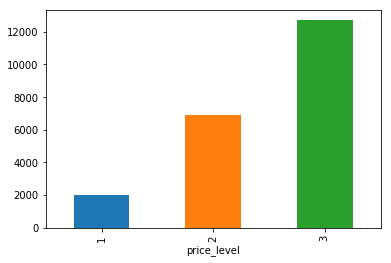

In [33]:
df.groupby('price_level').size().plot(kind='bar')

In [34]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('logistic_regression_docs').getOrCreate()

data = spark.read.csv('spark.csv',inferSchema=True,header=True)

In [35]:
data.columns

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'new_date',
 'new_sqft_living',
 'price_level']

In [36]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier,MultilayerPerceptronClassifier
from pyspark.ml import Pipeline

In [37]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['lat',
             'bedrooms',
             'sqft_basement',
             'view',
             'bathrooms',
             'new_sqft_living',
             'sqft_above',
             'grade',
             'sqft_living'],
              outputCol="features")

In [38]:
output = assembler.transform(data)

In [39]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="price_level", outputCol="price_level_Index")
output_fixed = indexer.fit(output).transform(output)

In [40]:
final_data = output_fixed.select("features",'price_level_Index')

In [41]:
train_data,test_data = final_data.randomSplit([0.9,0.1])
print(train_data.count())
print(test_data.count())

19490
2123


In [42]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="price_level_Index", predictionCol="prediction", metricName="accuracy")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="price_level_Index", predictionCol="prediction", metricName="f1")

In [43]:
rfc1 = RandomForestClassifier(labelCol='price_level_Index',featuresCol='features', numTrees=5, featureSubsetStrategy='10')
rfc1_model = rfc1.fit(train_data)
rfc1_predictions = rfc1_model.transform(test_data)
rfc1_acc = acc_evaluator.evaluate(rfc1_predictions)

rfc2 = RandomForestClassifier(labelCol='price_level_Index',featuresCol='features', numTrees=10, featureSubsetStrategy='2')
rfc2_model = rfc2.fit(train_data)
rfc2_predictions = rfc2_model.transform(test_data)
rfc2_acc = acc_evaluator.evaluate(rfc2_predictions)

rfc3 = RandomForestClassifier(labelCol='price_level_Index',featuresCol='features', numTrees=10, featureSubsetStrategy='10')
rfc3_model = rfc3.fit(train_data)
rfc3_predictions = rfc3_model.transform(test_data)
rfc3_acc = acc_evaluator.evaluate(rfc3_predictions)

rfc4 = RandomForestClassifier(labelCol='price_level_Index',featuresCol='features', numTrees=5, featureSubsetStrategy='2')
rfc4_model = rfc4.fit(train_data)
rfc4_predictions = rfc4_model.transform(test_data)
rfc4_acc = acc_evaluator.evaluate(rfc4_predictions)


In [44]:
print('A random forest ensemble 1 has an accuracy of: {0:2.2f}%'.format(rfc1_acc*100))

print('A random forest ensemble 2 has an accuracy of: {0:2.2f}%'.format(rfc2_acc*100))

print('A random forest ensemble 3 has an accuracy of: {0:2.2f}%'.format(rfc3_acc*100))

print('A random forest ensemble 4 has an accuracy of: {0:2.2f}%'.format(rfc4_acc*100))


A random forest ensemble 1 has an accuracy of: 80.88%
A random forest ensemble 2 has an accuracy of: 79.75%
A random forest ensemble 3 has an accuracy of: 80.69%
A random forest ensemble 4 has an accuracy of: 79.04%


In [45]:
dtc1 = DecisionTreeClassifier(labelCol='price_level_Index',featuresCol='features', maxDepth =10,maxBins =2)
dtc1_model = dtc1.fit(train_data)
dtc1_predictions = dtc1_model.transform(test_data)
dtc1_acc = acc_evaluator.evaluate(dtc1_predictions)

dtc2 = DecisionTreeClassifier(labelCol='price_level_Index',featuresCol='features', maxDepth =10,maxBins=6)
dtc2_model = dtc2.fit(train_data)
dtc2_predictions = dtc2_model.transform(test_data)
dtc2_acc = acc_evaluator.evaluate(dtc2_predictions)

dtc3 = DecisionTreeClassifier(labelCol='price_level_Index',featuresCol='features', maxDepth =5,maxBins=2)
dtc3_model = dtc3.fit(train_data)
dtc3_predictions = dtc3_model.transform(test_data)
dtc3_acc = acc_evaluator.evaluate(dtc3_predictions)

dtc4 = DecisionTreeClassifier(labelCol='price_level_Index',featuresCol='features', maxDepth =5,maxBins=6)
dtc4_model = dtc4.fit(train_data)
dtc4_predictions = dtc4_model.transform(test_data)
dtc4_acc = acc_evaluator.evaluate(dtc4_predictions)



In [46]:
print('A single decision tree 1 has an accuracy of: {0:2.2f}%'.format(dtc1_acc*100))

print('A single decision tree 2 has an accuracy of: {0:2.2f}%'.format(dtc2_acc*100))

print('A single decision tree 3 has an accuracy of: {0:2.2f}%'.format(dtc3_acc*100))

print('A single decision tree 4 has an accuracy of: {0:2.2f}%'.format(dtc4_acc*100))

A single decision tree 1 has an accuracy of: 73.43%
A single decision tree 2 has an accuracy of: 82.48%
A single decision tree 3 has an accuracy of: 70.23%
A single decision tree 4 has an accuracy of: 80.64%


In [48]:
# # Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
# print("Here are the results!")
# print('-'*40)
# print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
# print('A single decision tree has an f1 of: {}'.format(dtc_f1))
# print('-'*40)
# print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
# print('A random forest ensemble has an f1 of: {}'.format(rfc_f1))

In [49]:
rfc3_model.featureImportances


SparseVector(9, {0: 0.5557, 1: 0.0009, 2: 0.0002, 3: 0.0075, 4: 0.0074, 5: 0.0172, 6: 0.0093, 7: 0.0132, 8: 0.3885})

In [50]:
# layers = [4, 5, 4, 3]

# # create the trainer and set its parameters
# trainer = MultilayerPerceptronClassifier(labelCol="price_level_Index", featuresCol="features",maxIter=100, layers=layers, blockSize=1, seed=12)

# mlp_model = trainer.fit(train_data)
# # 
# # compute accuracy on the test set
# mlp_predictions=mlp_model.transform(test_data)
# mlp_acc = acc_evaluator.evaluate(mlp_predictions)
# # mlp_acc = acc_evaluator.evaluate(result)
# # print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

In [51]:
rfc3 = RandomForestClassifier(labelCol='price_level_Index',featuresCol='features', numTrees=10, featureSubsetStrategy='10')
rfc3_model = rfc3.fit(train_data)
rfc3_predictions = rfc3_model.transform(test_data)
rfc3_acc = acc_evaluator.evaluate(rfc3_predictions)
rfc3_f1= f1_evaluator.evaluate(rfc3_predictions)
print('A random forest ensemble 3 has an f1 of: {}'.format(rfc3_f1))

A random forest ensemble 3 has an f1 of: 0.8022483184638843
